In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

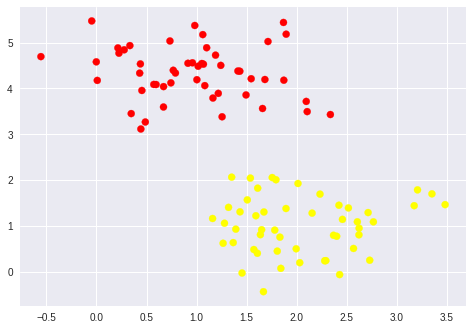

In [47]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_moons

X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [57]:
## TO plot a decision function, we first create a grid of all the combination of points between the lowest 
## and the highest value. 
## and then for every such point, we use our model to find their distance from the decision function,
## and use the points at level 0 to make decision boundary
## at level 1 and -1 to find support vectors

def plot_svc_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5, 
               linestyles=['--', '-', '--'])

In [58]:
## using a simple linear kernel from sklearn
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

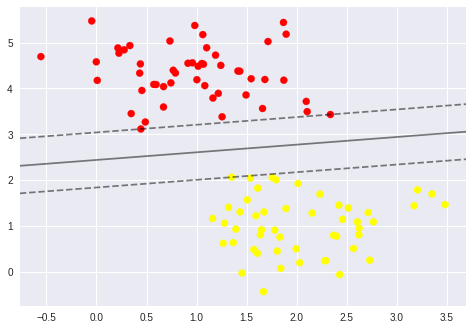

In [59]:
#plotting linear decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [60]:
def my_kernel(x, y):
    return np.dot(x, y.T)

In [9]:
model = SVC(kernel=my_kernel, C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function my_kernel at 0x7f6e56990b18>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

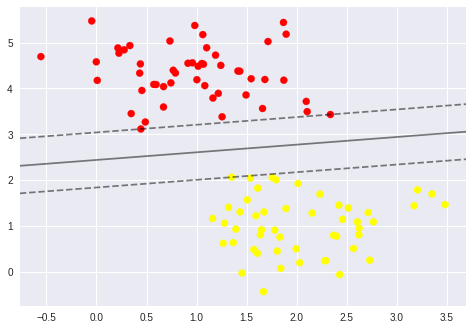

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [11]:
model = SVC(kernel='poly', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

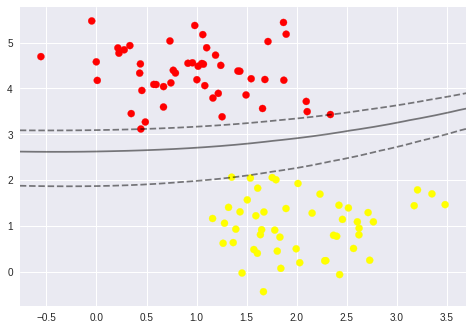

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [13]:
def my_poly(x, y):
    return np.power((np.dot(x, y.T)+1),3)

In [14]:
model = SVC(kernel=my_poly, C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function my_poly at 0x7f6e566f7f50>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

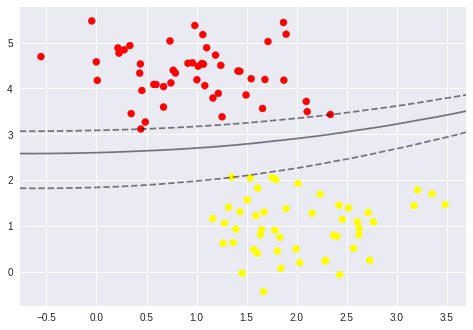

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [16]:
def mix_kernel(x, y):
    return (0.01*np.power((np.dot(x, y.T)+1),3) + 0.99*np.dot(x, y.T))

In [17]:
model = SVC(kernel=mix_kernel, C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function mix_kernel at 0x7f6e5677bc80>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

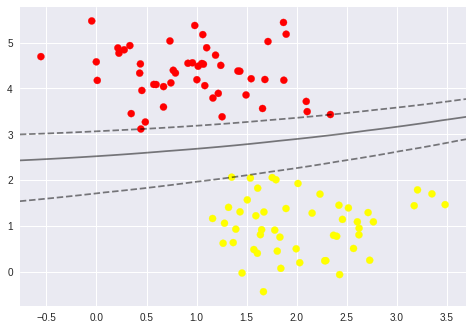

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [19]:
model = SVC(kernel="rbf", C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

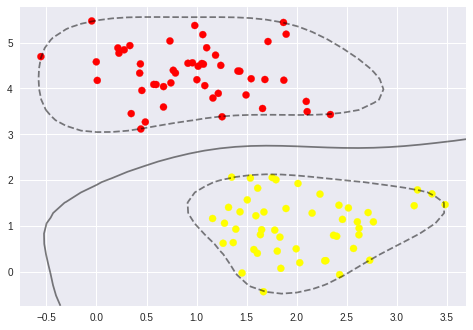

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);
plt.show()

In [21]:
def my_rbf(X1, X2):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = np.exp(- np.sum( np.power((x1 - x2),2) ) / float( 2*(1**2) ) )
    return gram_matrix

In [22]:
model = SVC(kernel=my_rbf, C=1E10)
model.fit(X, y) 

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function my_rbf at 0x7f6e566a6320>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

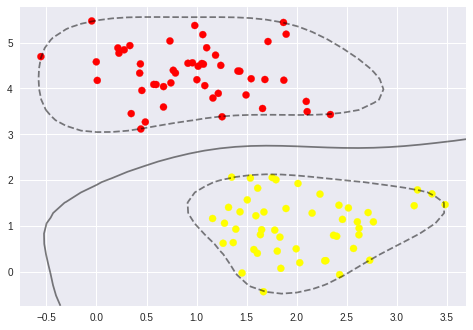

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [24]:
def rbf_2(X1, X2):
    
    x_square= np.zeros(X1.shape[0])
    for (i, x1) in enumerate(X1):
        x_square[i]= np.dot(x1, x1.T)
    y_square= np.zeros(X2.shape[0])
    for (i, x2) in enumerate(X2):
        y_square[i]= np.dot(x2, x2.T)
    x_square= x_square.reshape(X1.shape[0],1)
    y_square= y_square.reshape(X2.shape[0],1)
    k1= np.dot(x_square, np.ones((X2.shape[0], 1), dtype=np.float64).T)
    k2= np.dot(np.ones((X1.shape[0], 1), dtype=np.float64), y_square.T)
    k= k1+ k2
    temp= np.dot(X1, X2.T)
    temp =2*temp
    k= k- temp
    k= -k/(2*(np.power(1,2)))
    return np.exp(k)

In [25]:
model = SVC(kernel=rbf_2, C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function rbf_2 at 0x7f6e565e1d70>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

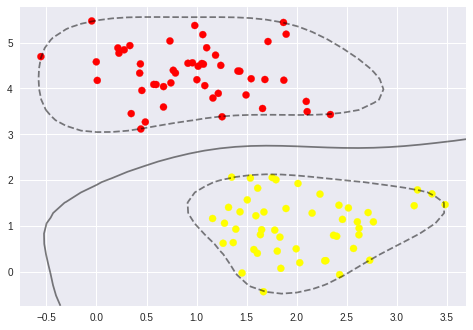

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [27]:
def mix(X1, X2):
    
    x_square= np.zeros(X1.shape[0])
    for (i, x1) in enumerate(X1):
        x_square[i]= np.dot(x1, x1.T)
        
    y_square= np.zeros(X2.shape[0])
    for (i, x2) in enumerate(X2):
        y_square[i]= np.dot(x2, x2.T)
        
    x_square= x_square.reshape(X1.shape[0],1)
    y_square= y_square.reshape(X2.shape[0],1)
    
    k1= np.dot(x_square, np.ones((X2.shape[0], 1), dtype=np.float64).T)
    k2= np.dot(np.ones((X1.shape[0], 1), dtype=np.float64), y_square.T)
    k= k1+ k2
    
    temp= np.dot(X1, X2.T)
    temp =2*temp
    k= k- temp
    k= -k/(2*(np.power(1,2)))
    return 0.5*np.exp(k) + 0.5*np.dot(X1, X2.T)

In [28]:
model = SVC(kernel=mix, C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function mix at 0x7f6e56644848>, max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

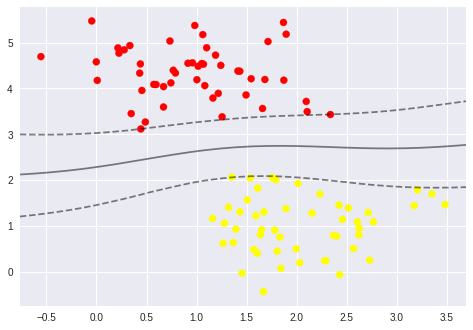

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

In [66]:
df = pd.read_csv("diabetes.csv")

In [67]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


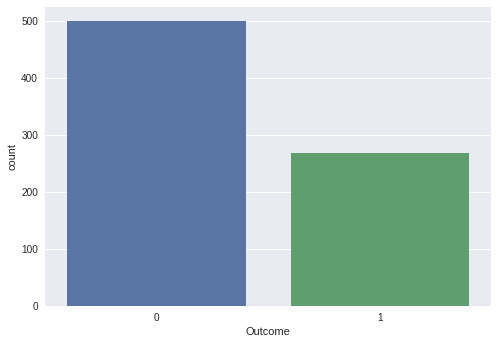

In [68]:
sns.countplot(x='Outcome',data=df)
plt.show()

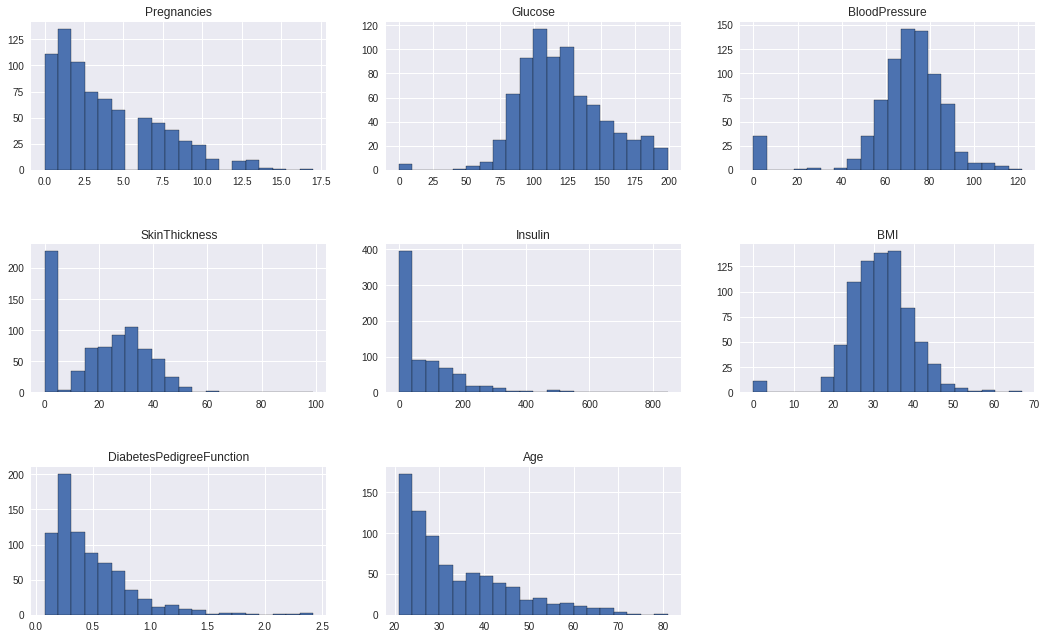

In [69]:
import itertools

columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)

for i,j in itertools.izip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

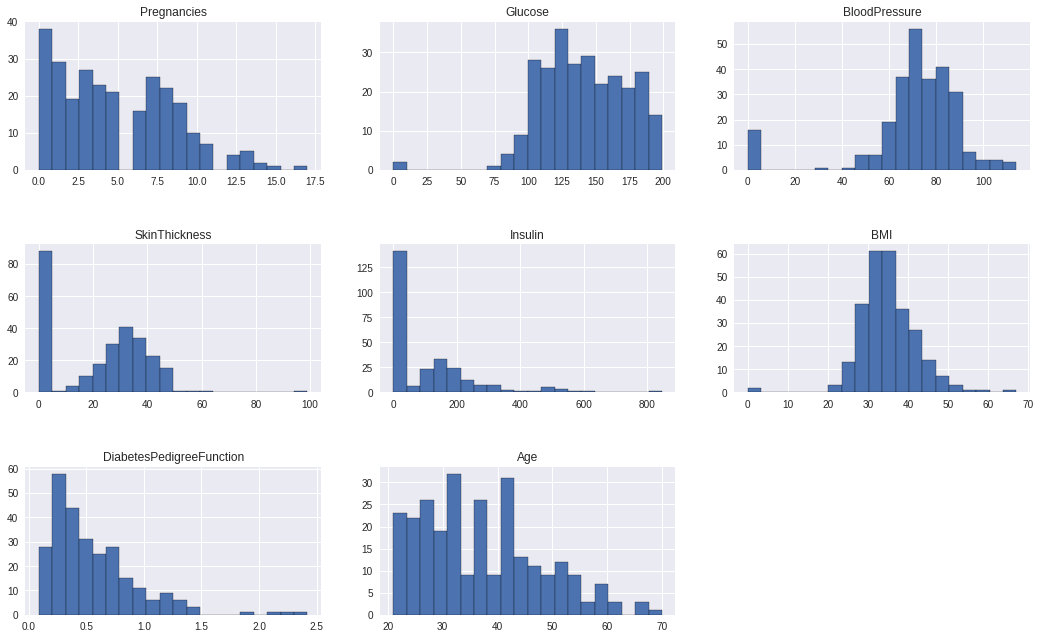

In [70]:
diab1=df[df['Outcome']==1]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.izip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

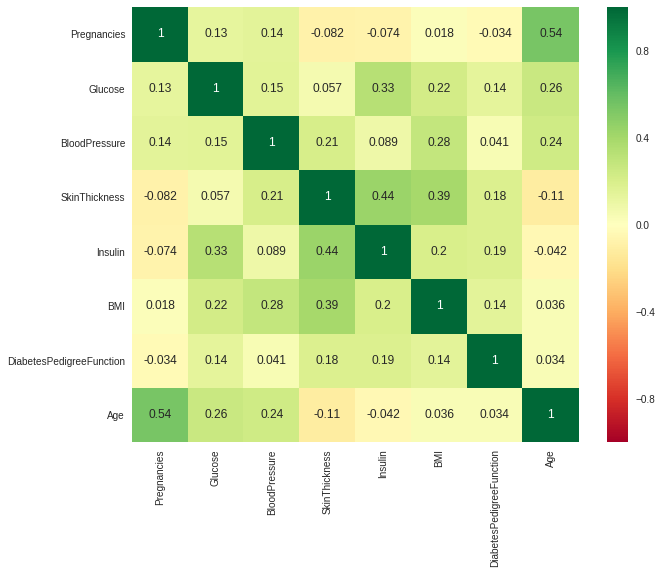

In [71]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier 

model= RandomForestClassifier(n_estimators=100,random_state=0)
X=df[df.columns[:8]]
Y=df['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

In [73]:
df2=df[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn import metrics

#Standardisation
features=df2[df2.columns[:4]]
features_standard=StandardScaler().fit_transform(features)

In [74]:
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
x['Outcome']=df2['Outcome']
outcome=x['Outcome']
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])
train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]
train_Y1=train1['Outcome']
test_Y1=test1['Outcome']

In [75]:
types=['rbf','linear','poly', mix]
for i in types:
    model=SVC(kernel=i)
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y1))

('Accuracy for SVM kernel=', 'rbf', 'is', 0.77083333333333337)
('Accuracy for SVM kernel=', 'linear', 'is', 0.78125)
('Accuracy for SVM kernel=', 'poly', 'is', 0.72395833333333337)
('Accuracy for SVM kernel=', <function mix at 0x7f6e56644848>, 'is', 0.77604166666666663)
